# AutoViML Image

Source: https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb

# Setup

In [ ]:
!pip install kaggle
!pip install deep_autoviml

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Fetch Data

In [ ]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2021-10-30 14:42:08--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip.1’

train.zip.1         100%[===================>] 137.15M   215MB/s    in 0.6s    

2021-10-30 14:42:09 (215 MB/s) - ‘train.zip.1’ saved [143812152/143812152]

--2021-10-30 14:42:09--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.211.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[=============

In [ ]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

Archive:  train.zip
   creating: train/
   creating: train/healthy/
   creating: train/angular_leaf_spot/
   creating: train/bean_rust/
  inflating: train/healthy/healthy_train.265.jpg  
  inflating: train/healthy/healthy_train.271.jpg  
  inflating: train/healthy/healthy_train.259.jpg  
  inflating: train/healthy/healthy_train.99.jpg  
  inflating: train/healthy/healthy_train.311.jpg  
  inflating: train/healthy/healthy_train.66.jpg  
  inflating: train/healthy/healthy_train.72.jpg  
  inflating: train/healthy/healthy_train.305.jpg  
  inflating: train/healthy/healthy_train.339.jpg  
  inflating: train/healthy/healthy_train.113.jpg  
  inflating: train/healthy/healthy_train.107.jpg  
  inflating: train/healthy/healthy_train.106.jpg  
  inflating: train/healthy/healthy_train.112.jpg  
  inflating: train/healthy/healthy_train.338.jpg  
  inflating: train/healthy/healthy_train.73.jpg  
  inflating: train/healthy/healthy_train.304.jpg  
  inflating: train/healthy/healthy_train.310.jpg  
 

# Loading Data

In [ ]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
target = 'image' ### It doesn't matter what name you give for image target
datapath = './'

In [ ]:
image_dir = datapath
img_height = 224
img_width = 224
img_channels = 3

# Model

In [ ]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as ./
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Number of image classes = 3 and they are: ['angular_leaf_spot', 'bean_rust', 'healthy']
Training image model. This will take time...
Epoch 1/3
17/17 [==============================] - 40s 2s/step - loss: 1.0247 - accuracy: 0.5087 - val_loss: 0.6880 - val_accuracy: 0.6992
Epoch 2/3
17/17 [==============================] - 30s 2s/step - loss: 0.6555 - accuracy: 0.7147 - val_loss: 0.5042 - val_accuracy: 0.7669
Epoch 3/3
3/3 [==============================] - 3s 847ms/step - loss: 0.4423 - accuracy: 0.8045
    Model accuracy in Image validation data: 0.8045112490653992

Model not being saved since save_model_flag set to False...
Model: "sequential_6"
____________________________________________________

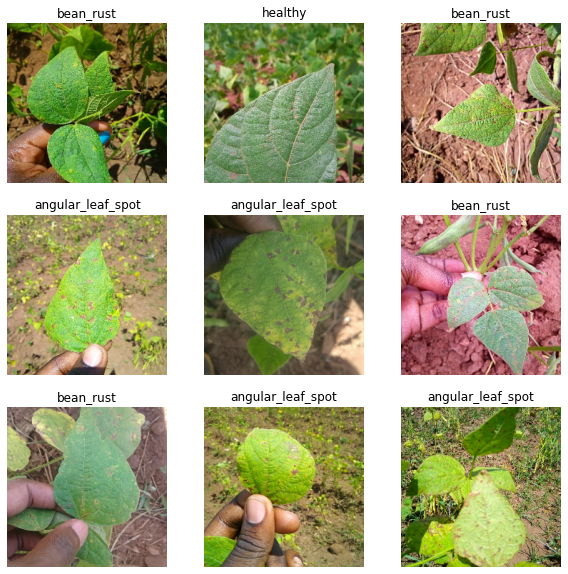

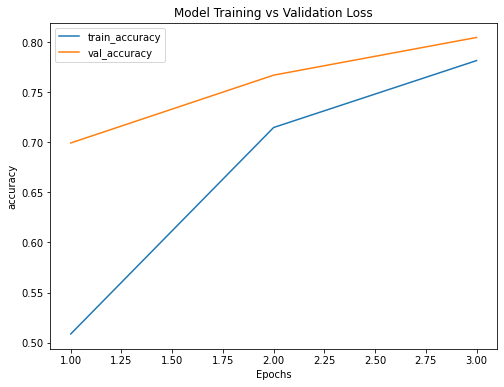

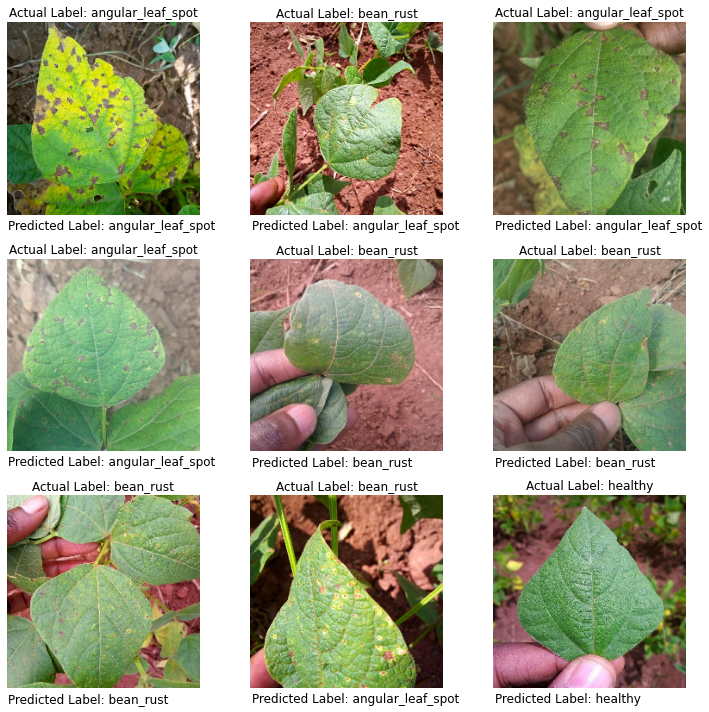

In [ ]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name='beans',
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

# Evaluation

In [ ]:
test_image_dir = './test'
predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7fa979924b10> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7fa979924b10> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: ./test
Found 128 files belonging to 3 classes.
    Sample predictions before inverse_transform: [2 2 0 1 2]
    Sample predictions after inverse_transform: ['healthy' 'healthy' 'angular_leaf_spot' 'bean_rust' 'healthy']


In [ ]:
print(predictions[-1])

['healthy' 'healthy' 'angular_leaf_spot' 'bean_rust' 'healthy' 'healthy'
 'angular_leaf_spot' 'bean_rust' 'angular_leaf_spot' 'bean_rust'
 'bean_rust' 'bean_rust' 'bean_rust' 'angular_leaf_spot' 'bean_rust'
 'healthy' 'bean_rust' 'healthy' 'healthy' 'angular_leaf_spot' 'healthy'
 'bean_rust' 'healthy' 'angular_leaf_spot' 'angular_leaf_spot' 'bean_rust'
 'healthy' 'bean_rust' 'angular_leaf_spot' 'healthy' 'angular_leaf_spot'
 'bean_rust' 'angular_leaf_spot' 'angular_leaf_spot' 'angular_leaf_spot'
 'bean_rust' 'healthy' 'angular_leaf_spot' 'healthy' 'angular_leaf_spot'
 'healthy' 'angular_leaf_spot' 'angular_leaf_spot' 'angular_leaf_spot'
 'angular_leaf_spot' 'healthy' 'bean_rust' 'angular_leaf_spot'
 'angular_leaf_spot' 'healthy' 'healthy' 'angular_leaf_spot' 'healthy'
 'angular_leaf_spot' 'healthy' 'angular_leaf_spot' 'bean_rust' 'bean_rust'
 'healthy' 'healthy' 'healthy' 'angular_leaf_spot' 'healthy' 'bean_rust'
 'angular_leaf_spot' 'bean_rust' 'angular_leaf_spot' 'angular_leaf_spot'
